In [ ]:
# creating heatmaps

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


OUTPUTPATH = '../output/'
OUTPUTFIGURES = '../figures/'

df = pd.read_pickle('/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/RPA_and_Buschers_data_with_dictionaryscores.pkl')
df['main_topic_id'] = df['main_topic_label'].factorize()[0]
num = df.index.to_list()
d = dict(zip(num, topics))

class get_heatmaps():
    '''Get those heatmaps'''

    def __init__(self, approach, sample, classifier = None):
        self.approach = approach
        self.sample = sample
        self.classifier = classifier
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read()) 
                
        with open('../resources/numbers_to_topic.json') as handle:
               self.translator_numbers = json.loads(handle.read()) 
                
       
    def get_data(self):
        
        if self.approach == "Dictionary Approach":
            df = pd.read_pickle('/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/RPA_and_Buschers_data_with_dictionaryscores.pkl')

            if self.sample == 'totalsample':
                df = df
            elif self.sample == 'newspaper_sample_only':
                df = df[df['type'] == 'newspaper']
            elif self.sample == 'pq_sample_only' :
                df = df[df['type'] == 'parlementary question']
            elif self.sample == 'RPA_sample' :
                df = df[df['origin'] == 'RPA']
            elif self.sample == 'Bjorns_sample' :
                df = df[df['origin'] == 'Bjorn']

            df = df[['main_topic_label', 'topic_label_dictionary']]
            df.rename(columns={'main_topic_label':'Actual label','topic_label_dictionary':'Predicted label'}, inplace=True)
            return df

        elif self.approach == 'SML':
            base = "{}SML_predicted_actual_{}.json".format(OUTPUTPATH, sample)
            print(base)
            df = pd.read_json(base)
            if self.classifier == "Passive Agressive":
                df = df[df['Classifier'] == "Passivie Aggressive"]
            if self.classifier == "SGDClassifier":
                df = df[df['Classifier'] == "SGDClassifier"]
            if self.classifier == "Naive Bayes":
                df = df[df['Classifier'] == "Naive Bayes"]
            return df
                
        elif self.approach == 'CNN':
            cnn_file = "{}output/predicted_actual.csv".format(OUTPUTPATH)
            df = pd.read_csv(cnn_file, sep='\t', header=None, names = ['Predicted label', 'Actual label'])
            df.replace(d, inplace=True)
            return df
    
    def confusion_matrix(self):
        df = self.get_data()
        df.replace(self.translator, inplace=True)  
        print(df.columns)
        confusion_matrix = pd.crosstab(df['Actual label'], df['Predicted label'], rownames=['True'], colnames=['Predicted'])
        cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        return cmn

    def get_heatmap(self):
        label = "Values in the diagonal represent the relative times that the manual coding (’true label’ - Y axis ) is equal to the classifier (X axis). Diagonal values indicate the relative number of correct predictions: The higher the values in diagonal, the better the prediction. Off-diagonal values indicate misclassification. Darker colours indicate higher values. Due to class imbalance, values are normalised to facilitate visual understanding. Values below 0.1 are not visualised. "
        cmn = self.confusion_matrix()
        cmn = cmn.round(1)
        fig, ax = plt.subplots(figsize=(10,10))
        heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="YlGnBu", mask=(cmn<0.1))
        fs = 12
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fs)
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fs)
        plt.title("Normalized Confusion Matrix (Classifier: {}) ".format(self.approach), fontsize= 16)
        plt.ylabel('True label (Manual coding)', fontsize=fs)
        plt.xlabel('Predicted label', fontsize=fs)
        return fig

    def get_figure_save(self):
        #logger.info('{}'.format(label))
        figure = self.get_heatmap()
        if self.approach == 'SML':
            fname = '{}Heatmap_{}_{}_{}'.format(OUTPUTFIGURES, self.approach, self.classifier, self.sample)
        else:
             fname = '{}Heatmap_{}_{}'.format(OUTPUTFIGURES, self.approach, self.classifier, self.sample)
        figure.savefig(fname, bbox_inches='tight')
        print('Saved figure as: {}'.format(fname))

In [448]:
b.approach

'CNN'

Index(['Predicted label', 'Actual label'], dtype='object')
Saved figure as: ../figures/Heatmap_CNN_None


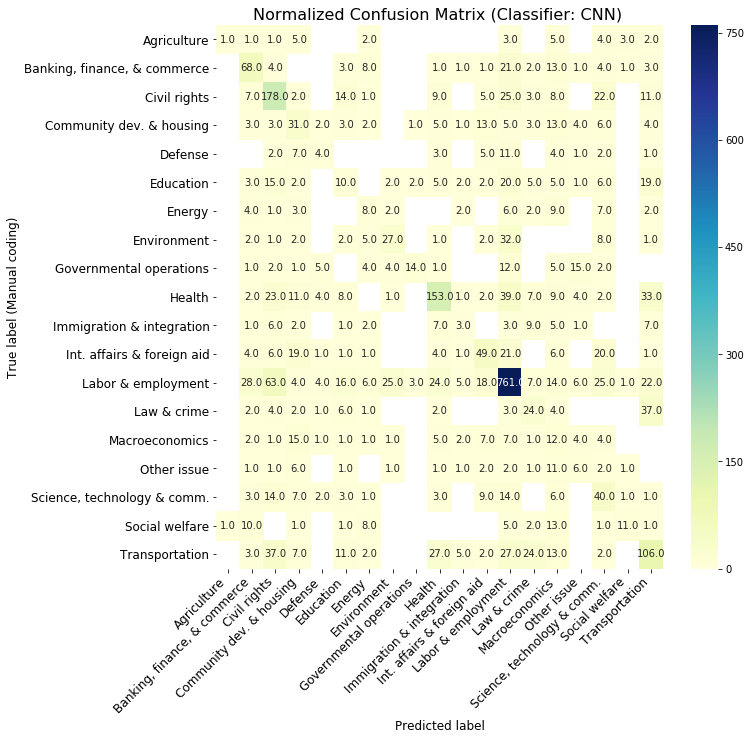

In [450]:
b = get_heatmaps(approach = 'CNN', sample = 'totalsample')
b.get_figure_save()

In [351]:



df = df.groupby('main_topic_id').max()
topics = list(df['main_topic_label'])


In [377]:
OUTPUTPATH = '../output/'
cnn_file = "{}output/predicted_actual.csv".format(OUTPUTPATH)
df = pd.read_csv(cnn_file, sep='\t', header=None, names = ['Predicted label', 'Actual label'])
df.replace(d, inplace=True)
df

,Predicted label,Actual label
0,Arbeid,Verkeer en vervoer
1,Milieu,Arbeid
2,Verkeer en vervoer,Verkeer en vervoer
3,Buitenlandse zaken en ontwikkelingssamenwerking,Macro-economie en belastingen
4,Verkeer en vervoer,"Justitie, Rechtspraak, Criminaliteit"
5,Energiebeleid,Arbeid
6,Arbeid,Arbeid
7,Arbeid,Arbeid
8,Burgerrechten en vrijheden,Burgerrechten en vrijheden
9,"Wetenschappelijk onderzoek, technologie en com...",Burgerrechten en vrijheden


In [355]:


with open('../resources/numbers_to_topic.json', 'w') as fp:
    json.dump(d, fp)

In [345]:
pd.read_csv('../output/output/predicted_actual.csv', sep='\t', header=None, names = ['Predicted label', 'Actual label'])

,Predicted label,Actual label
0,12,8
1,18,12
2,8,8
3,9,10
4,8,3
5,17,12
6,12,12
7,12,12
8,2,2
9,11,2


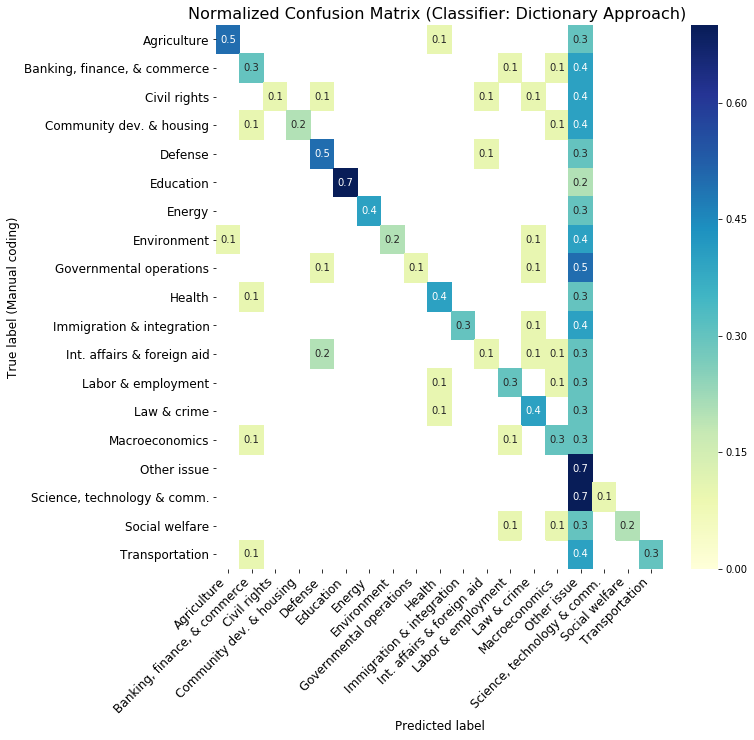

NameError: name 'approach' is not defined

In [333]:
## Dictionary

def get_confusion_matrix(approach, sample, classifier = None):
    if approach == "Dictionary Approach":
        df = pd.read_pickle('/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/RPA_and_Buschers_data_with_dictionaryscores.pkl')
       
        if sample == 'totalsample':
            df = df
        elif sample == 'newspaper_sample_only':
            df = df[df['type'] == 'newspaper']
        elif sample == 'pq_sample_only' :
            df = df[df['type'] == 'parlementary question']
        elif sample == 'RPA_sample' :
            df = df[df['origin'] == 'RPA']
        elif sample == 'Bjorns_sample' :
            df = df[df['origin'] == 'Bjorn']
            
        df = df[['main_topic_label', 'topic_label_dictionary']]
        df.rename(columns={'main_topic_label':'Actual label','topic_label_dictionary':'Predicted label'}, inplace=True)
        
    elif approach == 'SML':
        base = "{}SML_predicted_actual_{}.json".format(OUTPUTPATH, sample)
        print(base)
        df = pd.read_json(base)
        if classifier == "Passive Agressive":
            df = df[df['Classifier'] == "Passivie Aggressive"]
        if classifier == "SGDClassifier":
            df = df[df['Classifier'] == "SGDClassifier"]
        if classifier == "Naive Bayes":
            df = df[df['Classifier'] == "Naive Bayes"]
        
    df.replace(translation, inplace=True)
    confusion_matrix = pd.crosstab(df['Actual label'], df['Predicted label'], rownames=['True'], colnames=['Predicted'])
    cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    return cmn

def get_heatmap(approach, sample, classifier):
    label = "Values in the diagonal represent the relative times that the manual coding (’true label’ - Y axis ) is equal to the classifier (X axis). Diagonal values indicate the relative number of correct predictions: The higher the values in diagonal, the better the prediction. Off-diagonal values indicate misclassification. Darker colours indicate higher values. Due to class imbalance, values are normalised to facilitate visual understanding. Values below 0.1 are not visualised. "
    cmn = get_confusion_matrix(approach, sample, classifier)
    cmn = cmn.round(1)
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="YlGnBu", mask=(cmn<0.1))
    fs = 12
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fs)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fs)
    plt.title("Normalized Confusion Matrix (Classifier: {}) ".format(approach), fontsize= 16) 
    plt.ylabel('True label (Manual coding)', fontsize=fs)
    plt.xlabel('Predicted label', fontsize=fs)
    plt.show()
    return fig

def get_figure_save(approach, sample, classifier = None):
    #logger.info('{}'.format(label))
    figure = get_heatmap(approach, sample, classifier = None)
    if approach == 'SML':
        fname = '{}Heatmap_{}_{}_{}'.format(OUTPUTFIGURES, approach, classifier, sample)
    else:
         fname = '{}Heatmap_{}_{}'.format(OUTPUTFIGURES, approach, sample)
    figure.savefig(fname, bbox_inches='tight')
    print('Saved figure as: {}'.format(fname))
   

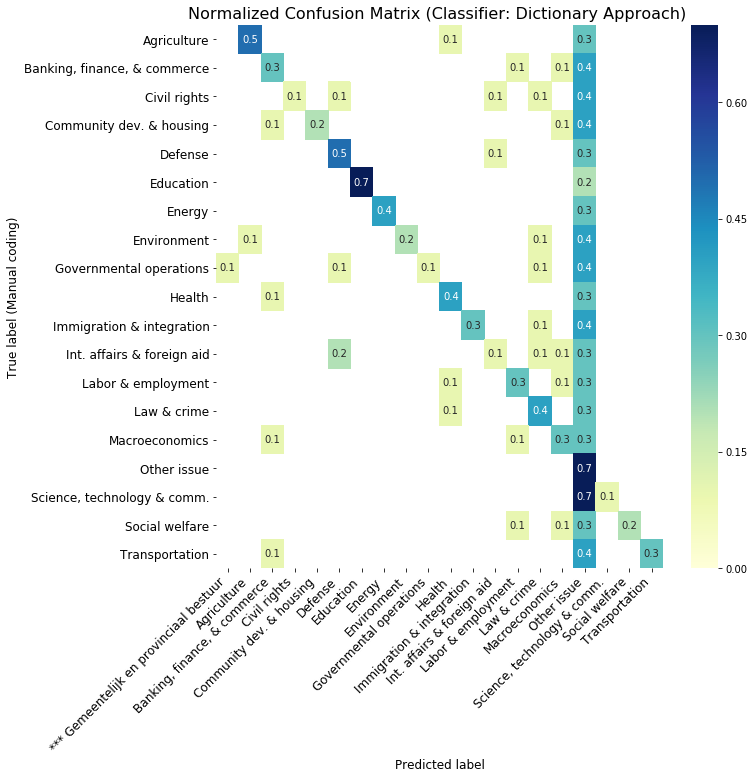

Saved figure as: ../figures/Heatmap_Dictionary Approach_totalsample


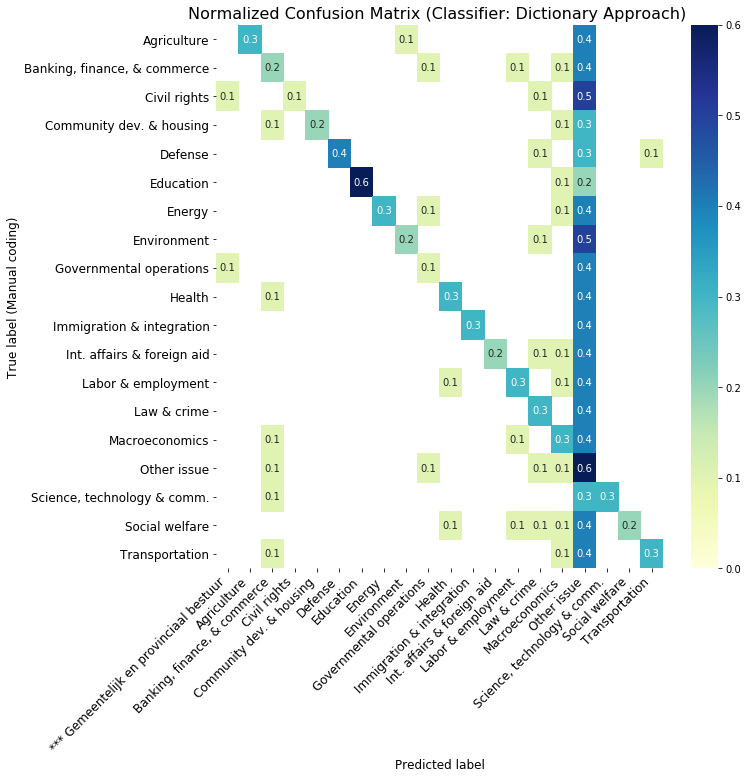

Saved figure as: ../figures/Heatmap_Dictionary Approach_RPA_sample
../output/SML_predicted_actual_totalsample.json


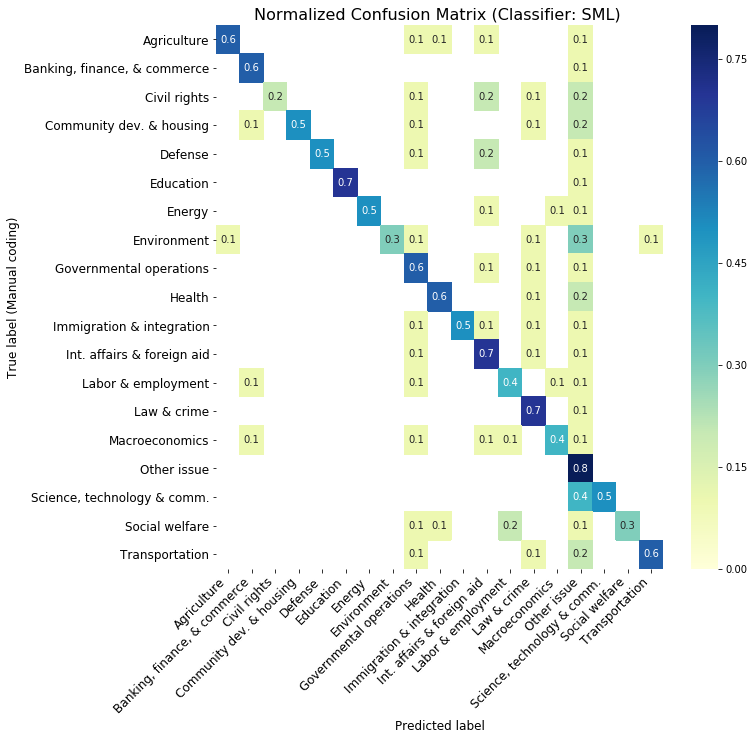

Saved figure as: ../figures/Heatmap_SML_Passive Aggressive_totalsample
../output/SML_predicted_actual_totalsample.json


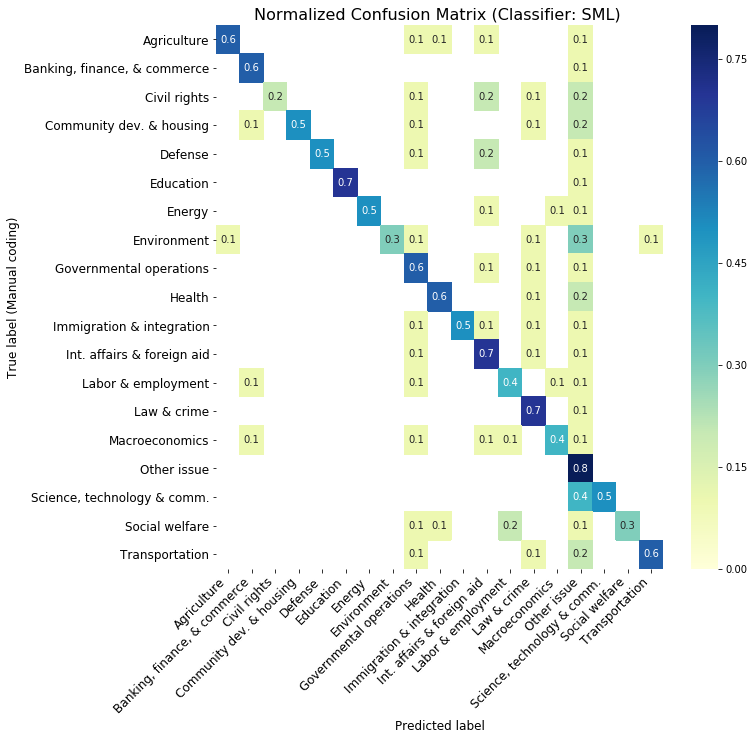

Saved figure as: ../figures/Heatmap_SML_Naive Bayes_totalsample
../output/SML_predicted_actual_RPA_sample.json


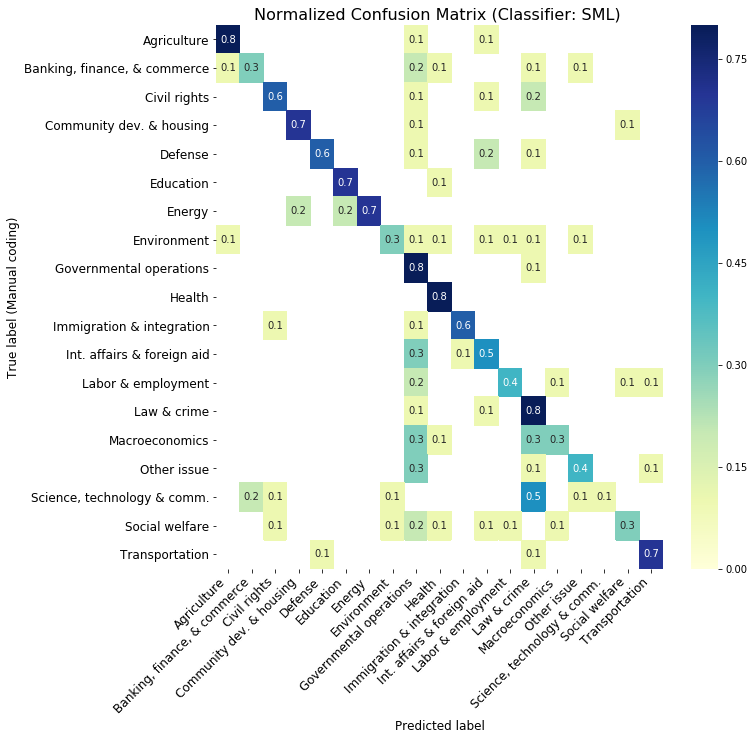

Saved figure as: ../figures/Heatmap_SML_Passive Aggressive_RPA_sample
../output/SML_predicted_actual_RPA_sample.json


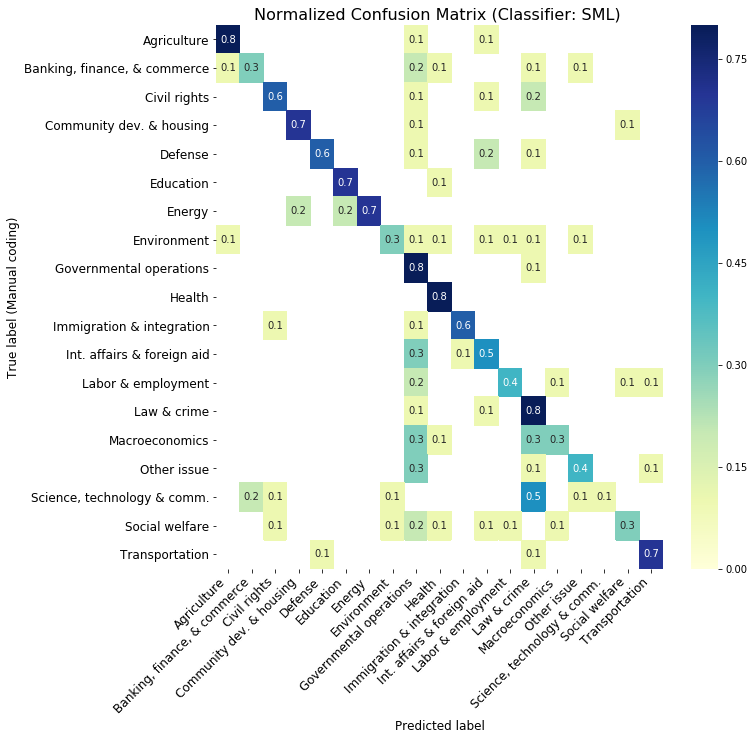

Saved figure as: ../figures/Heatmap_SML_Naive Bayes_RPA_sample


In [334]:
get_figure_save('Dictionary Approach', 'totalsample')
get_figure_save('Dictionary Approach', 'RPA_sample')

get_figure_save('SML', 'totalsample', 'Passive Aggressive')
get_figure_save('SML', 'totalsample', 'Naive Bayes')

get_figure_save('SML', 'RPA_sample', 'Passive Aggressive')
get_figure_save('SML', 'RPA_sample', 'Naive Bayes')


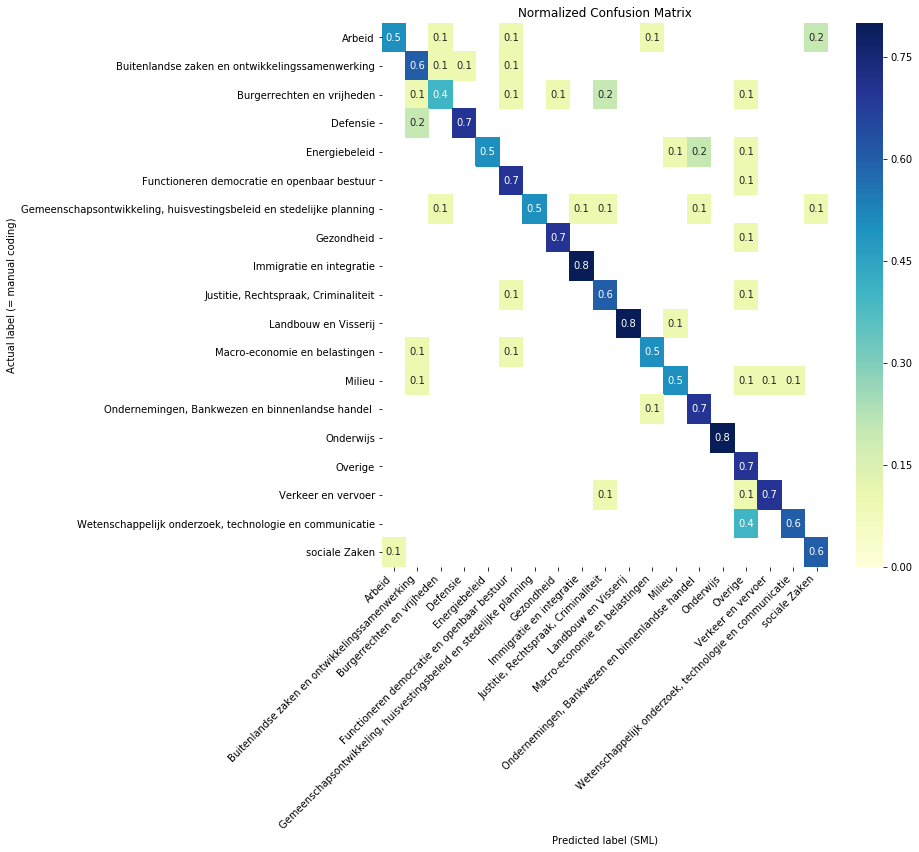

In [218]:
confusion_matrix = pd.crosstab(d_['Predicted label'], d_['Actual label'], rownames=['Actual'], colnames=['Predicted'])

#confusion_matrix = np.ma.masked_where(confusion_matrix == 0, data)

#plt.imshow(data_masked, interpolation = 'none', vmin = 0)

cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
cmn = cmn.round(1)

#cmn[cmn == 0] = np.nan # do not show zero's

fig, ax = plt.subplots(figsize=(10,10))

#heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="YlGnBu", mask=mask)

heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="YlGnBu", mask=(cmn<0.1))
fontsize = 10
#sns.heatmap(cmn, annot=True, fmt='.1f', cmap="YlGnBu")

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)

plt.title("Normalized Confusion Matrix")

    
plt.ylabel('Actual label (= manual coding)')
plt.xlabel('Predicted label (SML)')

#plt.xticks(rotation=90)

plt.show(block=False)


#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
import pandas as pd
import re
import logging
import os

PATH_TO_DATA = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILE = 'parliamentary_questions_parsed.pkl'

In [ ]:
def parse_parliamentary_questions():
    df = pd.read_pickle(PATH_TO_DATA + FILE)
    df['text'] = df['questions'].astype(str) + ' ' + df['answers'].astype(str)
    text = df['text'].to_list()
    sentence = [ re.split("(?<=[.!?])\s+", element) for element in text ]
    sentences = [item for sublist in sentence for item in sublist]
    logging.info("The total length of sentences is: {}...".format(len(sentences)))
    sentences = set(sentences)
    logging.info("...After removing duplicates, the length of the sentences is: {}".format(len(sentences)) )
    return sentences

In [ ]:
def get_sentences():
    
    sentences = parse_parliamentary_questions()
    
    filename = '{}sentences_parliamentary_questions.txt'.format(PATH_TO_DATA)
    dirname = os.path.dirname(filename)
    if not os.path.exists(dirname):
        os.makedirs(dirname)
   
    with open(filename, mode='w') as fo:
        for s in sentences:
            fo.write(s)
            fo.write('\n')
            
    print("Created file with sentences: {}".format(filename))

In [ ]:
if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

    get_sentences()

In [ ]:
df = pd.read_pickle(PATH_TO_DATA + 'VK_TEL_merged_with_annotated.pkl')

In [ ]:
df.head()

In [37]:
import numpy as np
import pandas as pd
import dateparser


parsed_kv = pd.read_pickle('/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/kamervragen_merged_with_annotated')
parsed_kv = parsed_kv.sample(400)

def split_date_year(row):
    if row == "NaN":
        date = "NaN"
        return date
    else: 
        date = dateparser.parse(row)
        return date
    
parsed_kv['date'] = parsed_kv['date_send_in'].apply(lambda row: split_date_year(row))

parsed_kv['date'] = pd.DatetimeIndex(parsed_kv['date'])
parsed_kv['YearMonth'] = parsed_kv['date'].map(lambda x: 100*x.year + x.month)

In [46]:
pd.read_pickle('/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/data/kamervragen_merged_with_annotated')

,index,Codeursnaam,type_content,doctype_or,political_content,publication_date,doc_number,topic_number,words_topic,frames,...,id_number,questions,answers,filename,describ,date_send_in,date_received,name,date,YearMonth
0,0,NaN,2,NaN,NaN,1996-02-05,1306,1201,"politieopleidingen, examinering, LSOP",1.0,...,1306.0,1 Hebt u het voornemen de examinering van poli...,1 Ja. 2 De bestuursraad van het LSOP heeft aan...,ah-tk-19951996-1306.xml,Vragen van het lid De Graaf (D66) over de moge...,2 mei 1996,14 juni 1996,De Graaf Dijkstal,1996-05-02,199605.0
1,979,4.0,2,NaN,NaN,1996-02-05,ah-tk-19951996-1306,1201,Politieopleidingen; LSOP,1.0,...,1306.0,1 Hebt u het voornemen de examinering van poli...,1 Ja. 2 De bestuursraad van het LSOP heeft aan...,ah-tk-19951996-1306.xml,Vragen van het lid De Graaf (D66) over de moge...,2 mei 1996,14 juni 1996,De Graaf Dijkstal,1996-05-02,199605.0
2,1,NaN,2,NaN,NaN,1996-08-02,1391,104,"valutering, Financiën, banken, betalingsverkee...",1.0,...,1391.0,1 Hoe valt het antwoord van de minister van Fi...,,ah-tk-19951996-1391.xml,Vragen van het lid Witteveen-Hevinga (PvdA) ov...,8 februari 1996,1 juli 1996,Witteveen-Hevinga Zalm,1996-02-08,199602.0
3,980,4.0,2,NaN,NaN,1996-08-02,ah-tk-19951996-1391,1521,MKB-Nederland; valutering; kostenstructuur; be...,1.0,...,1391.0,1 Hoe valt het antwoord van de minister van Fi...,,ah-tk-19951996-1391.xml,Vragen van het lid Witteveen-Hevinga (PvdA) ov...,8 februari 1996,1 juli 1996,Witteveen-Hevinga Zalm,1996-02-08,199602.0
4,2,NaN,2,NaN,NaN,1996-06-20,1453,1521,"MKB, midden- en kleinbedrijf, bedrijven, Finan...",1.0,...,1453.0,1 Hebt u kennis genomen van de in opdracht van...,1 Ja. 2 Voor de meeste van de maatregelen die ...,ah-tk-19951996-1453.xml,Vragen van het lid Van Walsem (D66) over het l...,20 juni 1996,12 juli 1996,Van Walsem Vermeend,1996-06-20,199606.0
5,948,4.0,2,NaN,NaN,1996-06-20,ah-tk-19951996-1453,107,MKB; lastenverlichting,1.0,...,1453.0,1 Hebt u kennis genomen van de in opdracht van...,1 Ja. 2 Voor de meeste van de maatregelen die ...,ah-tk-19951996-1453.xml,Vragen van het lid Van Walsem (D66) over het l...,20 juni 1996,12 juli 1996,Van Walsem Vermeend,1996-06-20,199606.0
6,3,NaN,2,NaN,NaN,1995-10-16,285,1006,"snorfietsen, strafrechtelijke, verkeer, inbesl...",1.0,...,285.0,"1 Deelt u de mening, dat strafrechtelijke midd...",1 In zijn algemeenheid acht ik deze stelling n...,ah-tk-19951996-285.xml,Aanvullende vragen van de leden Dankers en Sou...,16 oktober 1995,28 november 1995,Dankers Soutendijk-van\nAppeldoorn Sorgdrager,1995-10-16,199510.0
7,947,4.0,2,NaN,NaN,1995-10-16,ah-tk-19951996-285,1211,strafrechtelijke middelen; niet effectief; str...,1.0,...,285.0,"1 Deelt u de mening, dat strafrechtelijke midd...",1 In zijn algemeenheid acht ik deze stelling n...,ah-tk-19951996-285.xml,Aanvullende vragen van de leden Dankers en Sou...,16 oktober 1995,28 november 1995,Dankers Soutendijk-van\nAppeldoorn Sorgdrager,1995-10-16,199510.0
8,4,NaN,2,NaN,NaN,1996-02-22,798,704,"uranium, onderzoeksreactoren, COVRA, opslag, K...",1.0,...,798.0,1 Kent u het bericht als zouden de Verenigde S...,"1 Ja. 2, en 3 In het bericht wordt gesteld dat...",ah-tk-19951996-798.xml,Vragen van de leden Jorritsma-van Oosten en Au...,22 februari 1996,18 maart 1996,Jorritsma-van Oosten Augusteijn-Esser Wijers,1996-02-22,199602.0
9,946,4.0,2,NaN,NaN,1996-02-22,ah-tk-19951996-798,801,hoogverrijkt uranium; onderzoeksreactoren; COV...,1.0,...,798.0,1 Kent u het bericht als zouden de Verenigde S...,"1 Ja. 2, en 3 In het bericht wordt gesteld dat...",ah-tk-19951996-798.xml,Vragen van de leden Jorritsma-van Oosten en Au...,22 februari 1996,18 maart 1996,Jorritsma-van Oosten Augusteijn-Esser Wijers,1996-02-22,199602.0


In [ ]:
import dateparser

datetime.datetime(2016, 1, 11, 10, 50)

In [111]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'


RECODE = { 0 : "Onderwijs" ,
1 : "Burgerrechten en vrijheden" ,
2 : "Justitie, Rechtspraak, Criminaliteit" ,
3 : "Defensie" ,
4 : "Gezondheid",
5 : "Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning" ,
6 : "Functioneren democratie en openbaar bestuur" ,
7 : "Macro-economie en belastingen"    ,
8  : "Buitenlandse zaken en ontwikkelingssamenwerking" ,
9 : "Ondernemingen, Bankwezen en binnenlandse handel " ,
10 : "Arbeid" ,
11: "Verkeer en vervoer" ,
12: "Overige" ,
13: "sociale Zaken" ,
14: "Immigratie en integratie" ,
15: "Landbouw en Visserij" ,
16: "Energiebeleid" ,
17: "Milieu" ,
18: "Wetenschappelijk onderzoek, technologie en communicatie" }

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def gridsearch_with_classifiers(sample):

    df = get_data()

    logging.info('getting the data. keeping sample: {}'.format(sample))

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']

    logging.info('total size df: {}'.format(len(df)))
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)

    class_report = []
    my_dict = {}
    results = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) ,
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) ,
                   'clf__alpha': (1e-2, 1e-3, 1e-5),
                   'clf__penalty': ('l2', 'elasticnet')}
                 ]

    for name, classifier, params in zip(names, classifiers, parameters):
        my_results = {}
        
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        logger.info("Starting gridsearch....")
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = classifier
        results_to_dict['best estimators:'] = clf.best_estimator_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        class_report.append(results_to_dict)
 
        y_hats = clf.predict(X_test)
    
        my_results = {"predicted": y_hats, 
                      "actual" : y_test, 
                      "classifier" : classifier, 
                      "best estimator": clf.best_estimator_}
        
        results.append(my_results)

    return class_report, results

def get_scores(sample):
    class_report, results = gridsearch_with_classifiers(sample)
    fname_predictions = '{}predicted_actual_{}.json'.format(OUTPUT_PATH, sample)

    with open(fname_predictions, mode='w') as fo:
        json.dump(fname_predictions, fo)
    
    fname = '{}precision_recall_f1score_dictionary_SML{}.json'.format(OUTPUT_PATH, sample)

    with open(fname, mode='w') as fo:
        json.dump(class_report, fo)
        
if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

#    get_scores(sample="totalsample")
#    get_scores(sample="newspaper_sample_only")
    get_scores(sample="pq_sample_only")
#    get_scores(sample="RPA_sample")
#    get_scores(sample="Bjorns_sample")

   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True )
    #print(classification_report(, y_pred, target_names=target_names))


2019-09-24 18:00:29,370 : INFO : getting the data. keeping sample: pq_sample_only
2019-09-24 18:00:29,389 : INFO : total size df: 1755
2019-09-24 18:00:29,395 : INFO : Starting gridsearch....


Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
2019-09-24 18:00:46,751 : INFO : Starting gridsearch....


Naive Bayes score: 0.5555555555555556
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5384615384615384, 'recall': 0.6363636363636364, 'f1-score': 0.5833333333333334, 'support': 11}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.6176470588235294, 'recall': 0.5833333333333334, 'f1-score': 0.6, 'support': 36}, 'Burgerrechten en vrijheden': {'precision': 0.7727272727272727, 'recall': 0.6296296296296297, 'f1-score': 0.6938775510204083, 'support': 27}, 'Defensie': {'precision': 0.2307692307692307

KeyboardInterrupt: 

In [116]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def gridsearch_with_classifiers(sample):

    df = get_data()

    logging.info('getting the data. keeping sample: {}'.format(sample))

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']

    logging.info('total size df: {}'.format(len(df)))
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)

    class_report = []
    results = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) ,
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) ,
                   'clf__alpha': (1e-2, 1e-3, 1e-5),
                   'clf__penalty': ('l2', 'elasticnet')}
                 ]
    

    for name, classifier, params in zip(names, classifiers, parameters):
        my_dict = {}
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        logger.info("Starting gridsearch....")
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = classifier
        results_to_dict['best estimators:'] = clf.best_estimator_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        class_report.append(results_to_dict)
 
        y_hats = clf.predict(X_test)
    
        my_dict = {"predicted": y_hats, 
                     "actual" : y_test.values  , 
                     "classifier" : name}
        
        results.append(my_dict)
        
    return class_report, results


def get_scores(sample):
    class_report, results = gridsearch_with_classifiers(sample)
    fname_accuracy = '{}precision_recall_f1score{}.pkl'.format(OUTPUT_PATH, sample)
    
    fname_predictions = '{}predicted_actual_{}.pkl'.format(OUTPUT_PATH, sample)
    
    data =  dict((key,d[key]) for d in class_report for key in d)
    output = pd.DataFrame.from_dict(data)
    
    output.to_picke(fname_accuracy)
    
    data = pd.DataFrame.from_dict(results)

    predicted = data.predicted.apply(pd.Series) \
        .merge(data, right_index = True, left_index = True) \
        .drop(["predicted"], axis = 1) \
        .melt(id_vars = ['classifier'], value_name = "Predicted label")

    actual = data.actual.apply(pd.Series) \
        .merge(data, right_index = True, left_index = True) \
        .drop(["predicted"], axis = 1) \
        .melt(id_vars = ['classifier'], value_name = "Actual label")

    df = pd.merge(predicted, actual, how = 'inner', left_index = True, right_index = True)

    df['Classifier'] = df['classifier_x']
    df = df[df.variable_x != 'actual']
    df = df[['Predicted label', 'Actual label', 'Classifier']]

    df.to_pickle(fname_predictions)
        
#class_report, results = get_scores(sample="pq_sample_only")

2019-09-24 18:02:50,942 : INFO : getting the data. keeping sample: pq_sample_only
2019-09-24 18:02:50,964 : INFO : total size df: 1755
2019-09-24 18:02:50,968 : INFO : Starting gridsearch....


Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
2019-09-24 18:03:03,616 : INFO : Starting gridsearch....


Naive Bayes score: 0.5555555555555556
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5384615384615384, 'recall': 0.6363636363636364, 'f1-score': 0.5833333333333334, 'support': 11}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.6176470588235294, 'recall': 0.5833333333333334, 'f1-score': 0.6, 'support': 36}, 'Burgerrechten en vrijheden': {'precision': 0.7727272727272727, 'recall': 0.6296296296296297, 'f1-score': 0.6938775510204083, 'support': 27}, 'Defensie': {'precision': 0.2307692307692307

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier score: 0.5498575498575499
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5384615384615384, 'recall': 0.5384615384615384, 'f1-score': 0.5384615384615384, 'support': 13}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.47058823529411764, 'recall': 0.5925925925925926, 'f1-score': 0.5245901639344261, 'support': 27}, 'Burgerrechten en vrijheden': {'precision': 0.5909090909090909, 'recall': 0.65, 'f1-score': 0.6190476190476191, 'support': 20}, 'Defensie': {'precision': 0.384615384615

In [151]:
data =  dict((key,d[key]) for d in class_report for key in d)
output = pd.DataFrame.from_dict(data)

In [160]:
data = pd.DataFrame.from_dict(results)

predicted = data.predicted.apply(pd.Series) \
    .merge(data, right_index = True, left_index = True) \
    .drop(["predicted"], axis = 1) \
    .melt(id_vars = ['classifier'], value_name = "Predicted label")

actual = data.actual.apply(pd.Series) \
    .merge(data, right_index = True, left_index = True) \
    .drop(["predicted"], axis = 1) \
    .melt(id_vars = ['classifier'], value_name = "Actual label")

df = pd.merge(predicted, actual, how = 'inner', left_index = True, right_index = True)

df['Classifier'] = df['classifier_x']
df = df[df.variable_x != 'actual']
df = df[['Predicted label', 'Actual label', 'Classifier']]

In [161]:
df

,Predicted label,Actual label,Classifier
0,"Justitie, Rechtspraak, Criminaliteit","Justitie, Rechtspraak, Criminaliteit",Naive Bayes
1,"Justitie, Rechtspraak, Criminaliteit","Justitie, Rechtspraak, Criminaliteit",SGDClassifier
2,Buitenlandse zaken en ontwikkelingssamenwerking,Gezondheid,Naive Bayes
3,Gezondheid,Gezondheid,SGDClassifier
4,"Justitie, Rechtspraak, Criminaliteit",Burgerrechten en vrijheden,Naive Bayes
5,"Justitie, Rechtspraak, Criminaliteit",Burgerrechten en vrijheden,SGDClassifier
6,Overige,"Justitie, Rechtspraak, Criminaliteit",Naive Bayes
7,Overige,"Justitie, Rechtspraak, Criminaliteit",SGDClassifier
8,"Ondernemingen, Bankwezen en binnenlandse handel","Ondernemingen, Bankwezen en binnenlandse handel",Naive Bayes
9,Overige,"Ondernemingen, Bankwezen en binnenlandse handel",SGDClassifier


AttributeError: 'DataFrame' object has no attribute 'variable_x'

,Predicted label,Actual label
0,"Justitie, Rechtspraak, Criminaliteit","Justitie, Rechtspraak, Criminaliteit"
1,"Justitie, Rechtspraak, Criminaliteit","Justitie, Rechtspraak, Criminaliteit"
2,Buitenlandse zaken en ontwikkelingssamenwerking,Gezondheid
3,Gezondheid,Gezondheid
4,"Justitie, Rechtspraak, Criminaliteit",Burgerrechten en vrijheden
5,"Justitie, Rechtspraak, Criminaliteit",Burgerrechten en vrijheden
6,Overige,"Justitie, Rechtspraak, Criminaliteit"
7,Overige,"Justitie, Rechtspraak, Criminaliteit"
8,"Ondernemingen, Bankwezen en binnenlandse handel","Ondernemingen, Bankwezen en binnenlandse handel"
9,Overige,"Ondernemingen, Bankwezen en binnenlandse handel"
